In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
# mpl.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.size'] = 16

# Try granger causality

In [3]:
# df = pd.read_csv("aggregated_individual_data/0_aggregated.csv", index_col=0, header=0, parse_dates=["date"])
# df["date"] = df["date"]
# df= df.iloc[27:-1]
# df['days'] = (df['date'] - df['date'].min()).dt.days.astype(int)
# df.drop(["date","weekday", 'appCat.weather', 'appCat.office', 'appCat.game'], axis=1,inplace=True)
# # df.drop("Unnamed: 0", axis=1, inplace=True)
# df = df.loc[:, (df != 0).any(axis=0)]
# df

In [4]:
# def granger_causality_matrix(data, variables, test="ssr_chi2test", verbose=False, maxlag=7):
#     df = pd.DataFrame(np.zeros((len(variables),len(variables))), columns=variables, index=variables)
#     for c in df.columns:
#         for r in df.index:
#             test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
#             p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
#             min_p_value = np.min(p_values)
#             df.loc[r, c] = min_p_value
#     df.columns = [var + '_x' for var in variables]
#     df.index = [var + '_y' for var in variables]
#     return df

In [5]:
# # Use your granger_causality_matrix function on the days column
# variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities']
# granger_matrix = granger_causality_matrix(df[['days'] + list(df.columns)], list(df.columns), maxlag=4)
# granger_matrix

In [6]:
# plt.figure(figsize=(12,12))
# sns.heatmap(granger_matrix, cmap="Spectral_r")
# plt.show()

------

In [7]:
df1 = pd.read_csv(f"aggregated_individual_data/{0}_aggregated.csv", index_col=0,parse_dates=["date"])
df1['days'] = (df1['date'] - df1['date'].min()).dt.days.astype(int)
df1.drop(["date"],axis=1,inplace=True)
for i in range(1,27):
    df2 = pd.read_csv(f"aggregated_individual_data/{0}_aggregated.csv", index_col=0,parse_dates=["date"])

    df2['days'] = (df2['date'] - df2['date'].min()).dt.days.astype(int)
    df2.drop(["date"],axis=1,inplace=True)
    df1 += df2
df1

,weekday,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,mood_std,circumplex.arousal_std,circumplex.valence_std,activity_std,days
2,108,167.40,5.40,5.40,3.619353,485430.489002,162.0,0.0,84758.886,169584.030,...,121729.500,24717.015,0.000,16166.358,0.000,0.0,0.0,0.0,5.979901,0
3,135,172.80,16.20,13.50,6.395766,165838.346987,81.0,27.0,19748.583,133998.786,...,11870.064,1007.235,0.000,3175.767,0.000,0.0,0.0,0.0,4.485864,27
4,162,183.60,5.40,21.60,3.854010,182893.464039,0.0,0.0,34728.642,141407.613,...,24322.653,0.000,0.000,812.322,820.422,0.0,0.0,0.0,3.104968,54
5,0,162.00,21.60,0.00,2.131949,406278.477015,270.0,0.0,23407.812,250306.983,...,87037.902,11334.735,0.000,4825.764,0.000,0.0,0.0,0.0,2.829398,81
6,27,182.25,13.50,13.50,2.656101,579834.584975,0.0,27.0,27884.736,277472.277,...,51825.717,0.000,6351.021,6018.111,0.000,0.0,0.0,0.0,3.972020,108
7,54,178.20,-5.40,16.20,2.735325,443442.627010,0.0,0.0,31522.419,242696.331,...,123985.593,0.000,0.000,900.855,0.000,0.0,0.0,0.0,4.795157,135
8,81,189.00,5.40,21.60,4.306787,470938.049983,54.0,27.0,33191.829,187285.824,...,25255.287,1277.478,0.000,4833.783,0.000,0.0,0.0,0.0,6.109689,162
9,108,172.80,-16.20,16.20,2.583847,132934.202989,135.0,0.0,271690.065,23404.491,...,13844.007,30591.243,0.000,8146.359,0.000,0.0,0.0,0.0,4.470195,189
10,135,216.00,5.40,27.00,1.841476,224710.793993,108.0,27.0,52721.010,73458.684,...,12767.976,1415.745,0.000,16217.199,0.000,0.0,0.0,0.0,2.547329,216
11,162,202.50,-13.50,20.25,1.325510,122126.778025,0.0,0.0,11187.855,35059.635,...,4527.495,0.000,1794.879,1033.992,0.000,0.0,0.0,0.0,2.216088,243


In [8]:
# df1 = df1.apply(lambda x: x if pd.api.types.is_numeric_dtype(x) else x)
df1.drop(["days","weekday", "mood_std","circumplex.valence_std","circumplex.arousal_std", "activity_std", "appCat.weather"], axis=1,inplace=True)
# df1.drop(["weekday", "mood_std","circumplex.valence_std","circumplex.arousal_std", "activity_std"], axis=1,inplace=True)
df1.columns

Index(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities'],
      dtype='object')

In [12]:
def granger_causality_matrix(data, variables, test="ssr_chi2test", maxlag=12):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            # ensure time-series is stationary by first difference
            cur_data = data[[r, c]].apply(lambda x: np.diff(x)[1:], axis=0)
            test_result = grangercausalitytests(cur_data, maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i + 1][0][test][1], 4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



In [17]:

from statsmodels.tsa.api import VAR
model = VAR(train)
model_fitted = model.fit(2)
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

NameError: name 'train' is not defined

https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6

                        mood_x  circumplex.arousal_x  circumplex.valence_x  \
mood_y                  1.0000                0.5392                0.1826   
circumplex.arousal_y    0.0063                1.0000                0.0513   
circumplex.valence_y    0.5200                0.7936                1.0000   
activity_y              0.0189                0.3222                0.1496   
screen_y                0.6424                0.4691                0.2064   
call_y                  0.6795                0.0598                0.7324   
sms_y                   0.9797                0.5895                0.0558   
appCat.builtin_y        0.4794                0.0673                0.7160   
appCat.communication_y  0.2823                0.8649                0.9417   
appCat.entertainment_y  0.1109                0.0385                0.6684   
appCat.finance_y        0.3477                0.4293                0.8582   
appCat.game_y           0.5057                0.4168            

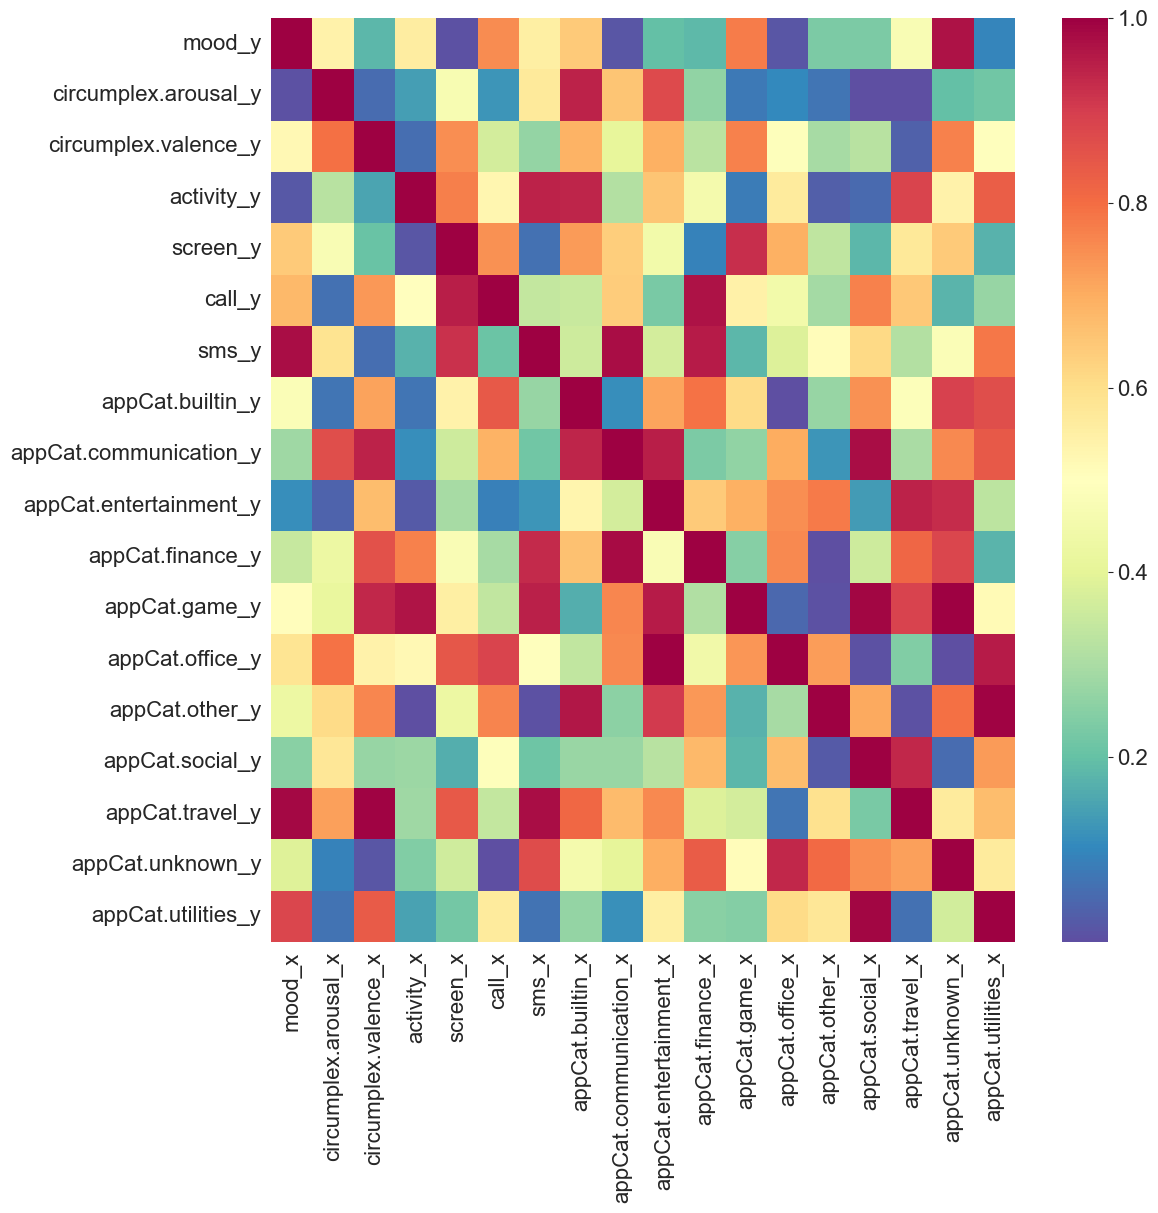

In [15]:
granger_matrix = granger_causality_matrix(df1, list(df1.columns), maxlag=1)
print(granger_matrix)
plt.figure(figsize=(12,12))
sns.heatmap(granger_matrix, cmap="Spectral_r")
plt.show()

                        mood_x  circumplex.arousal_x  circumplex.valence_x  \
mood_y                  1.0000                0.0000                0.0000   
circumplex.arousal_y    0.0000                1.0000                0.0000   
circumplex.valence_y    0.0000                0.0000                1.0000   
activity_y              0.0000                0.0000                0.0000   
screen_y                0.0000                0.0000                0.0000   
call_y                  0.0000                0.0000                0.0000   
sms_y                   0.0000                0.0000                0.0000   
appCat.builtin_y        0.0000                0.0000                0.0000   
appCat.communication_y  0.0000                0.0000                0.0000   
appCat.entertainment_y  0.0000                0.0000                0.0000   
appCat.finance_y        0.0833                0.0000                0.0818   
appCat.game_y           0.0000                0.0275            

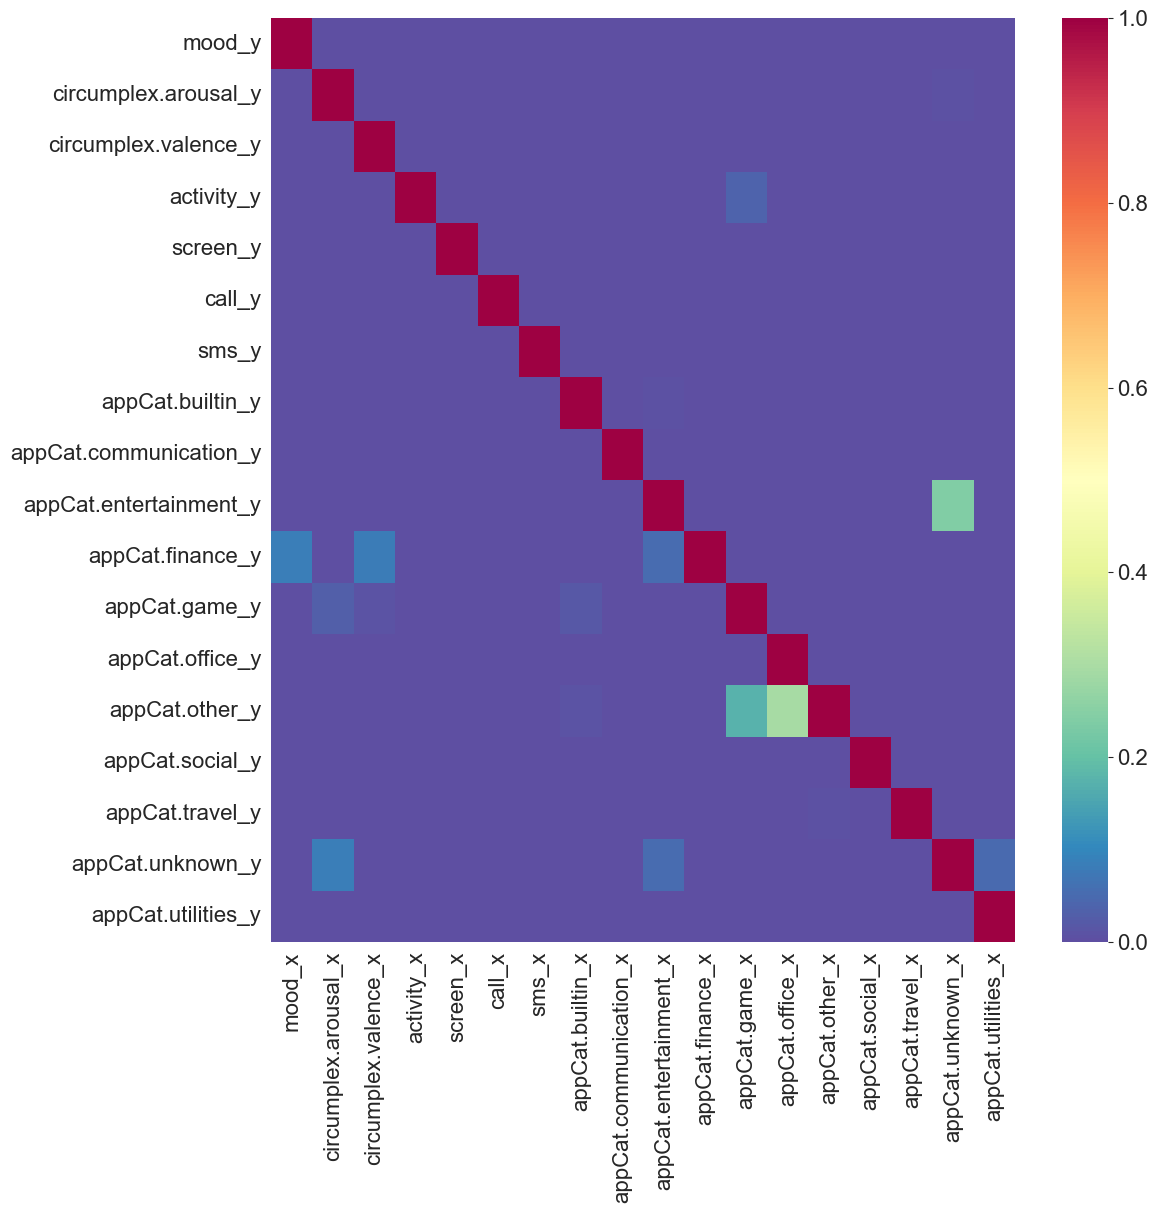

In [16]:
granger_matrix = granger_causality_matrix(df1, list(df1.columns), maxlag=13)
print(granger_matrix)
plt.figure(figsize=(12,12))
sns.heatmap(granger_matrix, cmap="Spectral_r")
plt.show()

In [45]:
def granger_causality_matrix_aic(data, variables, test="ssr_chi2test", maxlag=None, max_allowed_lag = 13):
    if maxlag is None:
        maxlag = len(data) // 2  # Set maxlag to half the length of the data by default

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            # ensure time-series is stationary by first difference
            cur_data = data[[r, c]].apply(lambda x: np.diff(x)[1:], axis=0)

            # Compute AIC for different values of maxlag
            aic_values = []
            for lag in range(1, maxlag+1):
                test_result = grangercausalitytests(cur_data, maxlag=lag, verbose=False)
                p_values = [test_result[i + 1][0][test][1] for i in range(lag)]
                log_likelihood = -len(cur_data) / 2 * np.log(2 * np.pi) - len(cur_data) / 2 * np.log(np.var(cur_data)) - len(cur_data) / 2 + np.sum(np.log(1 - np.array(p_values)))
                aic_values.append(2 * log_likelihood + 2 * (lag + 1))

            # Choose maxlag with lowest AIC within allowed bounds
            best_maxlag = np.argmin(aic_values) + 1
            while best_maxlag > max_allowed_lag:
                print(best_maxlag)
                print(aic_values)
                del aic_values[best_maxlag-1]# not select again, find second best
                best_maxlag = np.argmin(aic_values) + 1
                print(best_maxlag)
            # Compute min p-value with chosen maxlag
            test_result = grangercausalitytests(cur_data, maxlag=best_maxlag, verbose=False)
            p_values = [test_result[i + 1][0][test][1] for i in range(best_maxlag)]
            min_p_value = np.min(p_values)

            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [46]:
granger_matrix = granger_causality_matrix_aic(df1, list(df1.columns), maxlag=12)


/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_36824/2902240259.py:16: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -len(cur_data) / 2 * np.log(2 * np.pi) - len(cur_data) / 2 * np.log(np.var(cur_data)) - len(cur_data) / 2 + np.sum(np.log(1 - np.array(p_values)))
/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_36824/2902240259.py:16: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -len(cur_data) / 2 * np.log(2 * np.pi) - len(cur_data) / 2 * np.log(np.var(cur_data)) - len(cur_data) / 2 + np.sum(np.log(1 - np.array(p_values)))
/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_36824/2902240259.py:16: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -len(cur_data) / 2 * np.log(2 * np.pi) - len(cur_data) / 2 * np.log(np.var(cur_data)) - len(cur_data) / 2 + np.sum(np.log(1 - np.array(p_values)))
/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_36824/2902240259.py:16: RuntimeWarning: divi

21
[appCat.finance   -878.039953
mood             -355.091338
dtype: float64, appCat.finance   -880.235181
mood             -357.286566
dtype: float64, appCat.finance   -882.328202
mood             -359.379587
dtype: float64, appCat.finance   -884.902034
mood             -361.953419
dtype: float64, appCat.finance   -884.457458
mood             -361.508843
dtype: float64, appCat.finance   -884.818872
mood             -361.870257
dtype: float64, appCat.finance   -886.264894
mood             -363.316279
dtype: float64, appCat.finance   -888.024995
mood             -365.076380
dtype: float64, appCat.finance   -888.592260
mood             -365.643645
dtype: float64, appCat.finance   -890.447622
mood             -367.499007
dtype: float64, appCat.finance   -890.983024
mood             -368.034409
dtype: float64, appCat.finance   -889.157019
mood             -366.208404
dtype: float64]


IndexError: list assignment index out of range

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(granger_matrix, cmap="Spectral_r")
plt.show()